In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
import seaborn as sns

In [12]:
class SimpleKMeans:
    def __init__(self, k=3, max_iters=100):
        self.k = k  # number of clusters
        self.max_iters = max_iters
    
    def fit(self, X):
        # Step 1: Initialize centroids randomly
        self.centroids = self._init_centroids(X)
        
        for i in range(self.max_iters):
            # Step 2: Assign each point to closest centroid
            clusters = self._assign_clusters(X)
            
            # Step 3: Update centroids
            new_centroids = self._update_centroids(X, clusters)
            
            # Step 4: Check if converged (centroids don't change)
            if self._converged(self.centroids, new_centroids):
                print(f"Converged after {i+1} iterations")
                break
                
            self.centroids = new_centroids
        
        self.labels = self._assign_clusters(X)
        return self
    
    def _init_centroids(self, X):
        """Initialize centroids randomly from data points"""
        n_samples, n_features = X.shape
        centroids = np.zeros((self.k, n_features))
        
        for i in range(self.k):
            # Pick a random data point as initial centroid
            idx = np.random.randint(0, n_samples)
            centroids[i] = X[idx]
        
        return centroids
    
    def _assign_clusters(self, X):
        """Assign each point to the closest centroid"""
        clusters = []
        
        for point in X:
            # Calculate distance to each centroid
            distances = []
            for centroid in self.centroids:
                distance = np.sqrt(np.sum((point - centroid) ** 2))
                distances.append(distance)
            
            # Assign to closest centroid
            closest_cluster = np.argmin(distances)
            clusters.append(closest_cluster)
        
        return np.array(clusters)
    
    def _update_centroids(self, X, clusters):
        """Update centroids to be the mean of assigned points"""
        new_centroids = np.zeros((self.k, X.shape[1]))
        
        for i in range(self.k):
            # Find all points assigned to this cluster
            cluster_points = X[clusters == i]
            
            if len(cluster_points) > 0:
                # New centroid is the mean of all points in cluster
                new_centroids[i] = np.mean(cluster_points, axis=0)
            else:
                # If no points assigned, keep the old centroid
                new_centroids[i] = self.centroids[i]
        
        return new_centroids
    
    def _converged(self, old_centroids, new_centroids):
        """Check if centroids have stopped moving"""
        return np.allclose(old_centroids, new_centroids, rtol=1e-4)
    
    def predict(self, X):
        """Predict which cluster new points belong to"""
        return self._assign_clusters(X)
    
    def plot(self, X):
        """Plot the data points and centroids"""
        plt.figure(figsize=(8, 6))
        
        for i in range(self.k):
            cluster_points = X[self.labels == i]
            plt.scatter(cluster_points[:, 0], cluster_points[:, 1], 
                       label=f'Cluster {i}', alpha=0.7)
        
        # Plot centroids as black X's
        sns.scatterplot(x=self.centroids[:, 0], y=self.centroids[:, 1], 
                   c='black', marker='x', s=200, linewidth=3, label='Centroids')
        
        plt.title('K-Means Clustering')
        plt.xlabel('X1')
        plt.ylabel('X2')
        plt.legend()
        plt.grid(True, alpha=0.3)
        plt.show()

Converged after 13 iterations


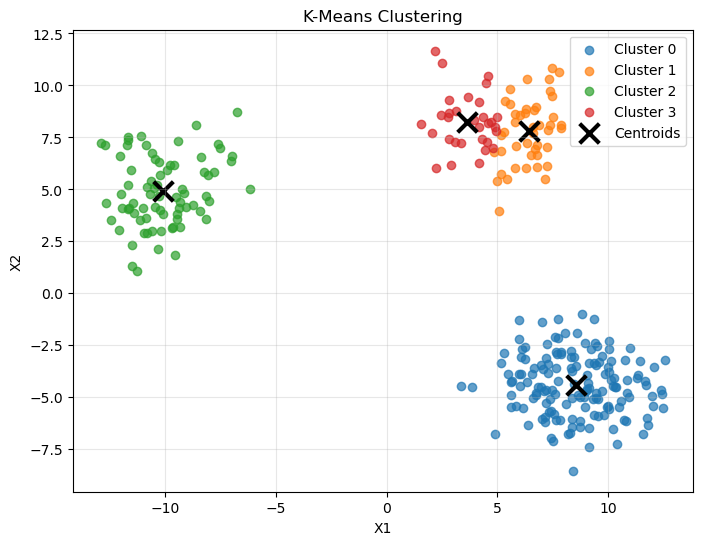

New points [[0 0]
 [5 5]] belong to clusters: [3 1]

--- Step-by-step example ---
Data points:
[[ 1.   2. ]
 [ 1.5  1.8]
 [ 5.   8. ]
 [ 8.   8. ]
 [ 1.   0.6]
 [ 9.  11. ]]
Converged after 3 iterations

Final centroids:
[[7.33333333 9.        ]
 [1.16666667 1.46666667]]
Final labels: [1 1 0 0 1 0]


In [16]:
X, _ = make_blobs(n_samples=300, centers=4, cluster_std=1.5)

# Apply K-Means
kmeans = SimpleKMeans(k=4)
kmeans.fit(X)

# Plot results
kmeans.plot(X)

# Test prediction on new points
new_points = np.array([[0, 0], [5, 5]])
predictions = kmeans.predict(new_points)
print(f"New points {new_points} belong to clusters: {predictions}")

# Show how algorithm works step by step
print("\n--- Step-by-step example ---")

# Simple 2D example
simple_data = np.array([[1, 2], [1.5, 1.8], [5, 8], [8, 8], [1, 0.6], [9, 11]])

print("Data points:")
print(simple_data)

kmeans_simple = SimpleKMeans(k=2, max_iters=5)
kmeans_simple.fit(simple_data)

print(f"\nFinal centroids:")
print(kmeans_simple.centroids)
print(f"Final labels: {kmeans_simple.labels}")